In [ ]:
# Displaying benefits data for the new 2022 wards.

In [1]:
# Dependencies
%%capture
!pip install --upgrade geopandas mapclassify

     |████████████████████████████████| 1.0 MB 7.2 MB/s 
     |████████████████████████████████| 15.4 MB 52.0 MB/s 
     |████████████████████████████████| 6.3 MB 65.5 MB/s 


In [32]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive

Data
==


GDrive mount
--

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
ward_dir = f"{project_dir}/boundaries/2022_wards"
benefits_dir = f"{project_dir}/benefits"

# Outputs
out_dir = f"{project_dir}/benefits/maps"

In [5]:
!mkdir -p "{out_dir}"

In [ ]:
!ls -lh "{ward_dir}"/*.gpkg

-rw------- 1 root root 292K Nov  1 14:53 /content/gdrive/MyDrive/WardProfiles/boundaries/2022_wards/lbl_wd22_proposed.gpkg


In [ ]:
!ls -lh "{benefits_dir}"/*.csv

-rw------- 1 root root  39K Nov  3 17:24 /content/gdrive/MyDrive/WardProfiles/benefits/lbl_benefits_claimants_female_lsoa11.csv
-rw------- 1 root root 6.0K Nov  3 17:24 /content/gdrive/MyDrive/WardProfiles/benefits/lbl_benefits_claimants_female_wd22.csv
-rw------- 1 root root  40K Nov  3 17:24 /content/gdrive/MyDrive/WardProfiles/benefits/lbl_benefits_claimants_male_lsoa11.csv
-rw------- 1 root root 6.1K Nov  3 17:24 /content/gdrive/MyDrive/WardProfiles/benefits/lbl_benefits_claimants_male_wd22.csv
-rw------- 1 root root  42K Nov  3 17:24 /content/gdrive/MyDrive/WardProfiles/benefits/lbl_benefits_claimants_total_lsoa11.csv
-rw------- 1 root root 6.3K Nov  3 17:24 /content/gdrive/MyDrive/WardProfiles/benefits/lbl_benefits_claimants_total_wd22.csv


Ward geometry
--

In [6]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

19

Claimants data: total, male, female
--


In [7]:
total = pd.read_csv(f"{benefits_dir}/lbl_benefits_claimants_total_wd22.csv")
print(len(total))
total.head()

19


,WD22CD_proposed,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,February 2017,March 2017,April 2017,May 2017,June 2017,July 2017,August 2017,September 2017,October 2017,November 2017,December 2017,January 2018,February 2018,March 2018,April 2018,May 2018,June 2018,July 2018,August 2018,September 2018,October 2018,November 2018,December 2018,January 2019,February 2019,March 2019,April 2019,May 2019,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021
0,E05013714,255,275,260,295,280,275,275,265,245,255,245,220,235,265,285,305,305,305,305,290,290,295,285,290,315,335,335,325,310,325,300,280,290,310,325,360,355,365,375,385,395,405,410,425,435,440,450,465,455,480,495,630,910,910,925,945,955,950,945,945,935,990,1000,985,955,885,860,850,825
1,E05013715,235,245,245,255,250,255,255,275,275,255,255,250,260,255,275,280,270,280,260,270,270,270,270,255,255,240,235,255,235,240,215,225,230,235,240,255,265,270,305,300,305,320,335,335,350,345,345,345,350,370,385,610,875,840,850,855,880,875,910,910,920,915,940,945,870,830,795,760,750
2,E05013716,360,370,370,380,370,380,360,355,360,350,340,345,365,350,375,385,400,400,385,390,395,390,380,380,390,390,395,405,395,395,390,385,425,435,450,460,465,485,510,500,505,540,550,540,555,545,540,535,530,565,550,925,1445,1400,1465,1570,1580,1525,1555,1555,1525,1565,1605,1555,1485,1375,1320,1265,1235
3,E05013717,260,255,255,250,235,210,235,245,255,255,240,235,245,250,250,270,265,255,270,240,250,245,235,230,240,250,250,260,245,245,225,215,215,235,240,275,285,290,305,315,320,330,335,325,355,350,360,375,390,405,410,615,965,935,970,990,1025,1005,1025,1020,1005,1045,1065,1080,1025,945,900,865,820
4,E05013718,220,225,235,240,240,220,220,215,200,205,190,180,200,210,220,205,185,190,190,175,175,195,205,180,190,195,200,215,215,200,190,185,205,215,215,215,235,255,265,270,265,280,290,305,300,320,305,305,305,305,290,540,830,825,820,865,860,815,850,840,810,860,875,835,805,730,690,655,645


In [11]:
male = pd.read_csv(f"{benefits_dir}/lbl_benefits_claimants_male_wd22.csv")
print(len(male))
male.head()

19


,WD22CD_proposed,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,February 2017,March 2017,April 2017,May 2017,June 2017,July 2017,August 2017,September 2017,October 2017,November 2017,December 2017,January 2018,February 2018,March 2018,April 2018,May 2018,June 2018,July 2018,August 2018,September 2018,October 2018,November 2018,December 2018,January 2019,February 2019,March 2019,April 2019,May 2019,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021
0,E05013714,150,165,150,165,165,155,165,150,155,150,155,140,160,175,180,195,195,180,170,175,160,175,170,175,190,205,220,215,200,205,200,190,180,190,200,230,215,225,240,240,245,260,265,265,270,265,275,290,285,295,320,400,595,590,600,610,615,600,595,605,590,620,625,615,590,560,550,530,515
1,E05013715,135,140,150,140,140,140,150,155,150,145,145,160,145,150,155,150,140,140,135,145,150,140,145,145,150,140,130,140,140,135,120,125,130,135,130,140,140,165,175,170,170,190,190,195,210,195,190,185,190,200,215,340,490,460,475,475,470,490,485,500,505,520,515,525,490,455,420,405,395
2,E05013716,210,210,225,235,210,220,210,215,210,220,220,220,230,215,225,230,230,235,215,230,240,230,240,240,240,230,235,230,225,230,220,195,225,225,255,245,265,280,295,285,285,315,300,310,300,305,305,300,300,315,320,510,805,785,820,865,855,825,855,835,825,860,895,875,805,775,730,715,695
3,E05013717,165,165,155,155,140,130,125,125,140,140,125,135,140,135,140,155,145,155,165,150,145,145,155,150,150,160,155,160,150,150,145,135,125,140,140,150,155,165,170,190,175,185,180,175,195,185,215,210,225,225,230,335,555,530,550,560,580,590,575,590,565,600,610,620,585,540,525,490,490
4,E05013718,135,130,135,130,135,130,125,120,110,125,125,100,110,105,125,110,110,100,100,95,105,105,110,105,110,110,120,125,135,115,115,105,105,110,115,125,125,135,145,140,145,145,150,155,155,175,165,170,170,165,155,280,450,455,450,490,480,460,480,470,455,475,500,475,450,425,390,380,375


In [12]:
female = pd.read_csv(f"{benefits_dir}/lbl_benefits_claimants_female_wd22.csv")
print(len(female))
female.head()

19


,WD22CD_proposed,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,February 2017,March 2017,April 2017,May 2017,June 2017,July 2017,August 2017,September 2017,October 2017,November 2017,December 2017,January 2018,February 2018,March 2018,April 2018,May 2018,June 2018,July 2018,August 2018,September 2018,October 2018,November 2018,December 2018,January 2019,February 2019,March 2019,April 2019,May 2019,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021
0,E05013714,105,105,110,120,115,120,110,110,100,105,90,75,80,95,105,110,105,125,130,115,120,115,115,115,120,125,120,115,110,105,100,95,95,115,120,135,135,140,130,140,140,145,150,155,165,170,185,170,170,175,170,230,310,320,330,335,340,350,355,345,355,370,380,370,360,330,320,320,310
1,E05013715,95,105,105,105,105,115,115,110,120,115,105,100,100,105,110,115,120,125,125,125,125,120,115,90,120,110,110,115,100,110,110,110,105,100,110,120,115,115,125,135,140,140,130,145,140,150,155,155,155,160,175,270,385,380,375,390,410,390,430,400,410,405,420,430,390,365,370,360,350
2,E05013716,160,160,150,165,160,150,150,150,155,135,130,125,130,140,150,165,160,170,160,165,165,160,140,145,165,170,160,165,170,175,170,165,195,205,200,195,200,205,215,205,215,240,255,245,255,245,235,225,235,240,230,410,630,605,650,705,715,695,705,710,695,710,720,685,680,610,595,540,545
3,E05013717,85,100,90,95,90,85,110,125,120,120,115,115,105,115,120,115,115,105,110,100,100,100,85,90,90,90,90,95,90,95,85,80,95,105,105,120,120,125,150,135,140,150,145,160,170,150,150,160,165,175,175,275,405,410,425,435,450,420,445,445,445,455,460,455,440,405,365,360,335
4,E05013718,90,95,100,110,100,95,95,90,90,90,75,75,90,105,95,85,75,80,80,70,75,85,90,75,65,75,80,90,95,80,75,75,95,105,100,95,95,115,105,130,135,130,140,145,135,150,145,135,140,145,125,245,370,375,375,375,380,350,370,370,345,375,370,365,345,305,300,270,275


Prep
--

In [8]:
# Available months
months = total.columns[1:].values
months

array(['January 2016', 'February 2016', 'March 2016', 'April 2016',
       'May 2016', 'June 2016', 'July 2016', 'August 2016',
       'September 2016', 'October 2016', 'November 2016', 'December 2016',
       'January 2017', 'February 2017', 'March 2017', 'April 2017',
       'May 2017', 'June 2017', 'July 2017', 'August 2017',
       'September 2017', 'October 2017', 'November 2017', 'December 2017',
       'January 2018', 'February 2018', 'March 2018', 'April 2018',
       'May 2018', 'June 2018', 'July 2018', 'August 2018',
       'September 2018', 'October 2018', 'November 2018', 'December 2018',
       'January 2019', 'February 2019', 'March 2019', 'April 2019',
       'May 2019', 'June 2019', 'July 2019', 'August 2019',
       'September 2019', 'October 2019', 'November 2019', 'December 2019',
       'January 2020', 'February 2020', 'March 2020', 'April 2020',
       'May 2020', 'June 2020', 'July 2020', 'August 2020',
       'September 2020', 'October 2020', 'November 2020', 'D

In [9]:
# Most recent month (in the right-most column)
month = months[-1]
month

'September 2021'

In [13]:
# Assign Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()

total['WD22NM_proposed'] = total.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])
male['WD22NM_proposed'] = male.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])
female['WD22NM_proposed'] = female.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])

Summary of most recent month
==

In [ ]:
# Let's check out a sample value
total[total.WD22NM_proposed=='Bellingham'][month]

0    825
Name: September 2021, dtype: int64

Summary table
--

In [ ]:
# Claimants per ward
summary = pd.concat({
    'Total Claimants': total.groupby('WD22NM_proposed')[month].sum(),
    'Male Claimants': male.groupby('WD22NM_proposed')[month].sum(),
    'Female Claimants': female.groupby('WD22NM_proposed')[month].sum()
}, axis=1).fillna(0).astype(int)
summary['% Female Claimants'] = (summary['Female Claimants'] * 100. / summary['Total Claimants']).round(1)
summary

,Total Claimants,Male Claimants,Female Claimants,% Female Claimants
WD22NM_proposed,,,,
Bellingham,825,515,310,37.6
Blackheath,750,395,350,46.7
Brockley,1235,695,545,44.1
Catford South,820,490,335,40.9
Crofton Park,645,375,275,42.6
Deptford,1050,610,445,42.4
Downham,1075,610,460,42.8
Evelyn,755,425,325,43.0
Forest Hill,810,475,340,42.0


Maps
--

In [ ]:
wd22_total = wd22.merge(total[['WD22CD_proposed', month]], on='WD22CD_proposed')
wd22_male = wd22.merge(male[['WD22CD_proposed', month]], on='WD22CD_proposed')
wd22_female = wd22.merge(female[['WD22CD_proposed', month]], on='WD22CD_proposed')

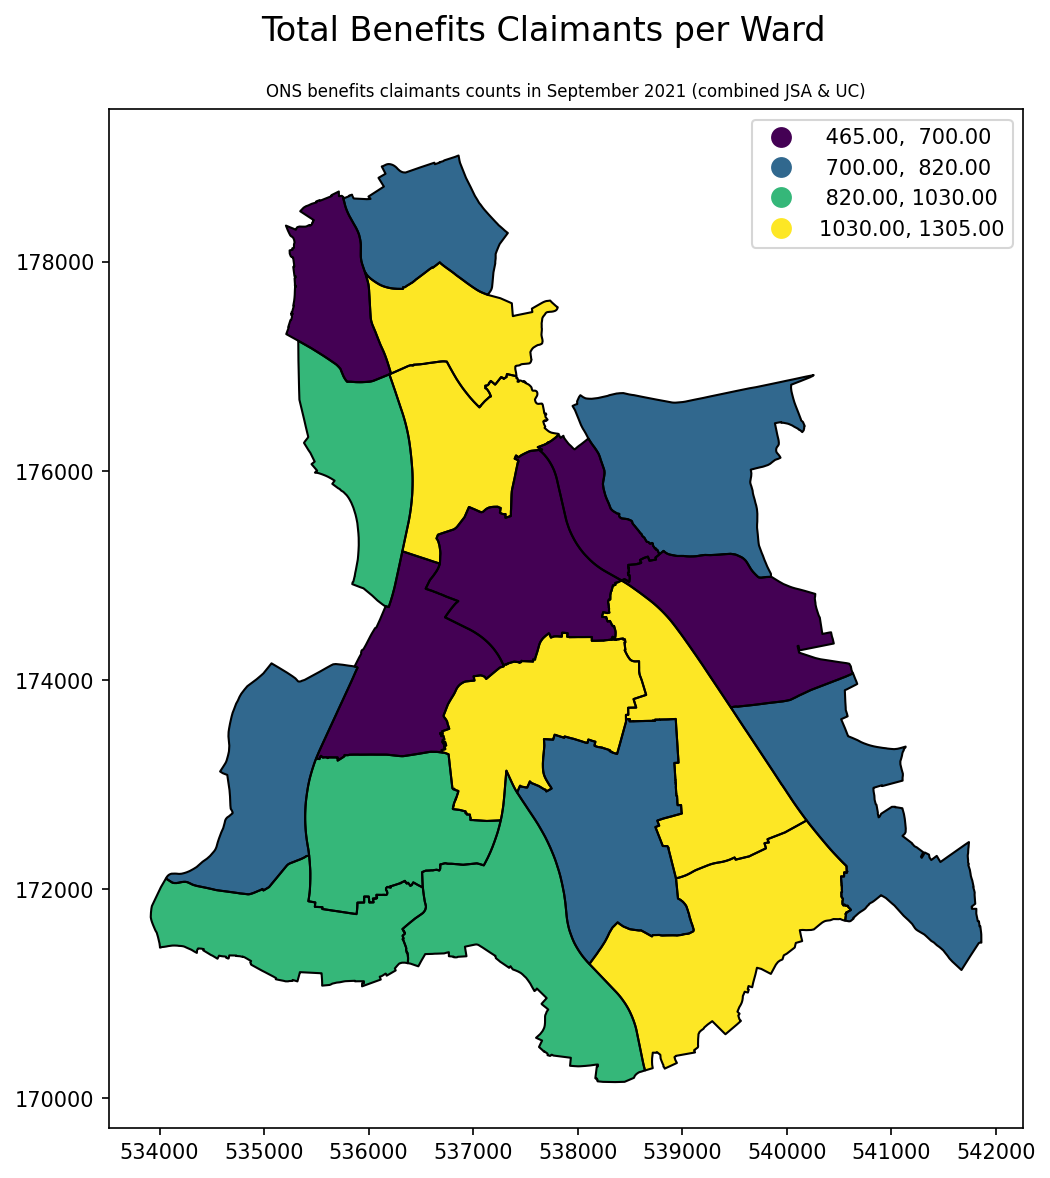

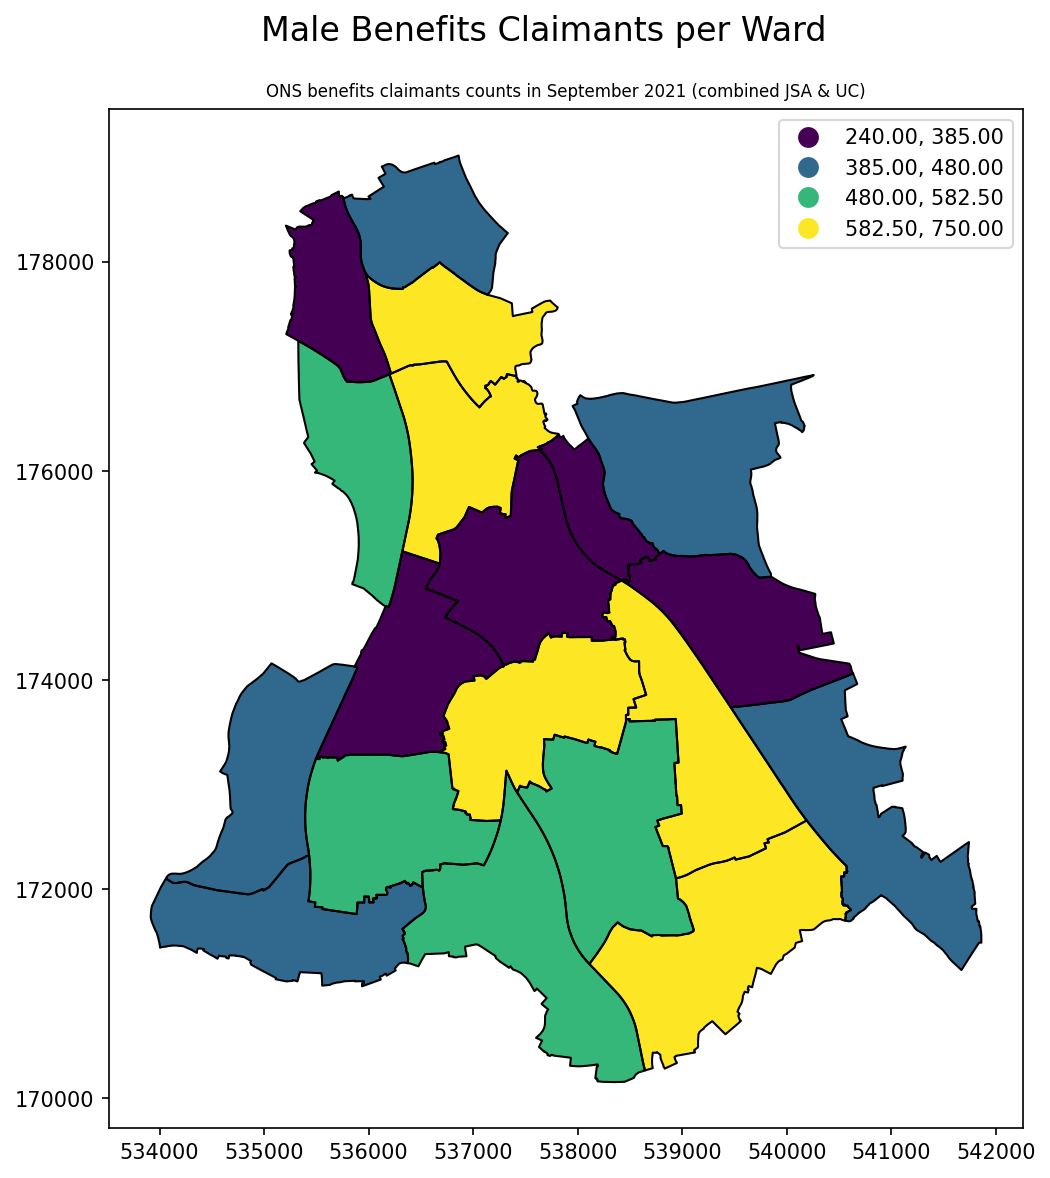

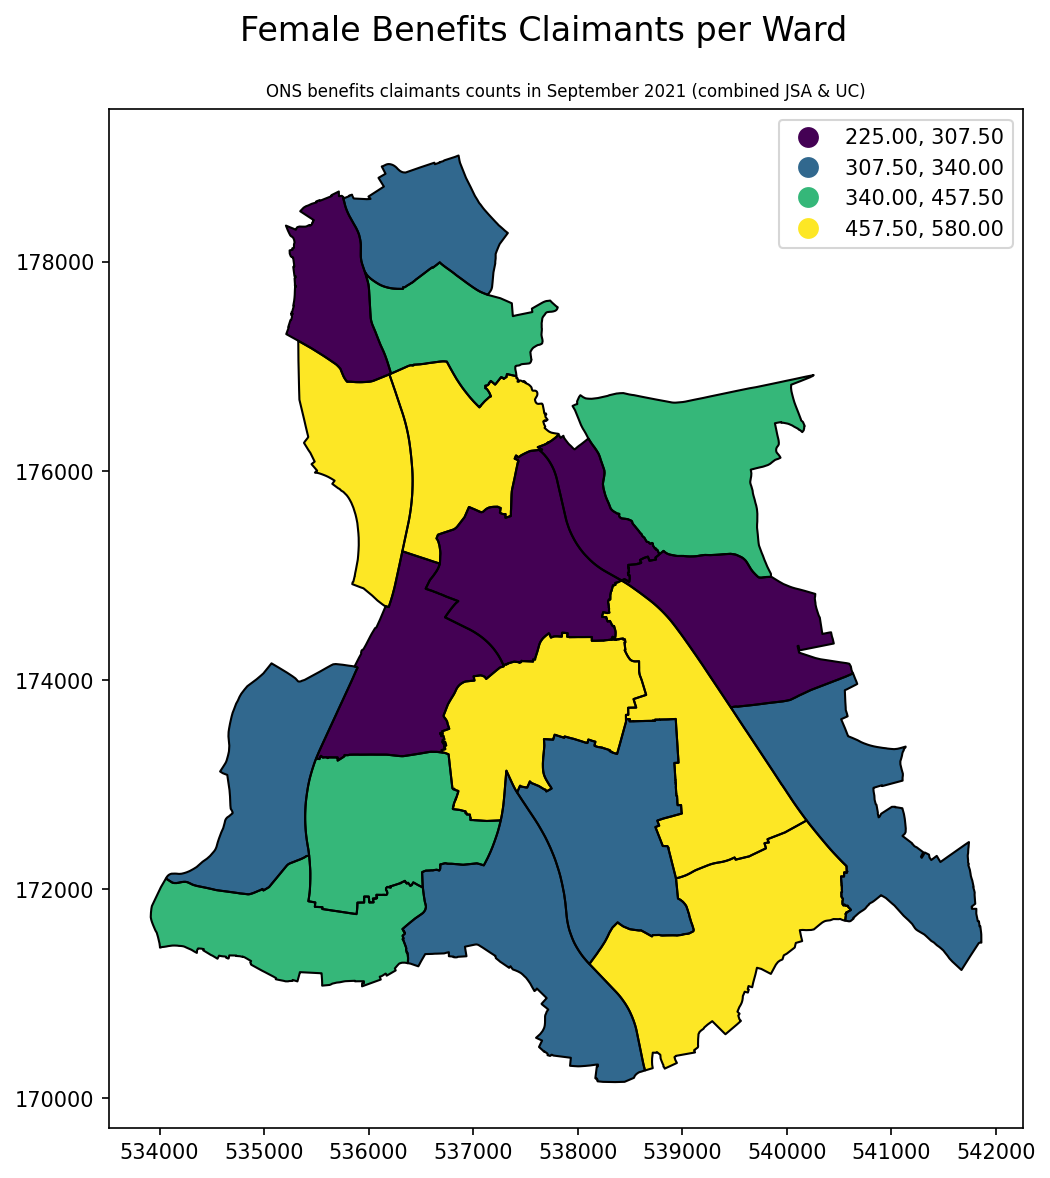

In [ ]:
for group, name, d in zip(
    ['total', 'male', 'female'],
    ['Total', 'Male', 'Female'],
    [wd22_total, wd22_male, wd22_female]):
  
  # Plot
  fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
  plt.suptitle(f'{name} Benefits Claimants per Ward', fontsize=16, y=.95)
  plt.title(f'ONS benefits claimants counts in {month} (combined JSA & UC)', fontsize=8)
  d.plot(ax=ax, column=month, 
                legend=True,
                # mapclassify parameters for breaks
                # See https://pysal.org/mapclassify/api.html
                scheme='Quantiles', 
                classification_kwds={
                    'k': 4
                }) 
  wd22.plot(ax=ax, facecolor='none', linewidth=1, edgecolor='black')
  # plt.legend()

  plt.savefig(f"{out_dir}/lbl_wd22_benefits_claimants_{group}.png", dpi=600)
  plt.savefig(f"{out_dir}/lbl_wd22_benefits_claimants_{group}.pdf")

Change over time
==

Across Lewisham
--

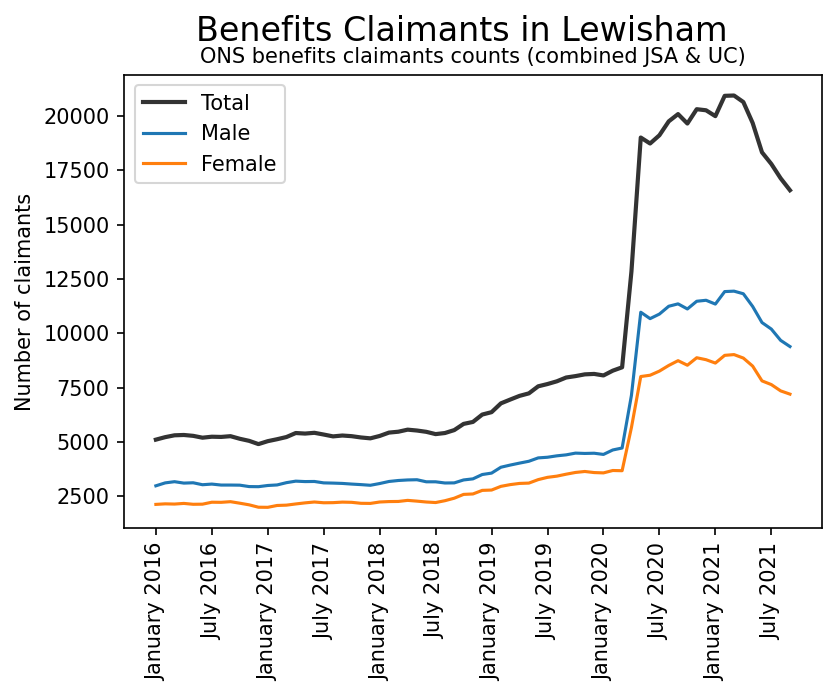

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)

plt.suptitle('Benefits Claimants in Lewisham', fontsize=16)
plt.title('ONS benefits claimants counts (combined JSA & UC)', fontsize=10)
  
plt.plot(total.sum().loc[months], label='Total', color='#333333', linewidth=2)
plt.plot(male.sum().loc[months], label='Male')
plt.plot(female.sum().loc[months], label='Female')
plt.legend()
plt.ylabel('Number of claimants')
# ax.xaxis.set_major_locator(MonthLocator())
# ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
ax.tick_params(axis="x", labelrotation= 90)

By Ward
--

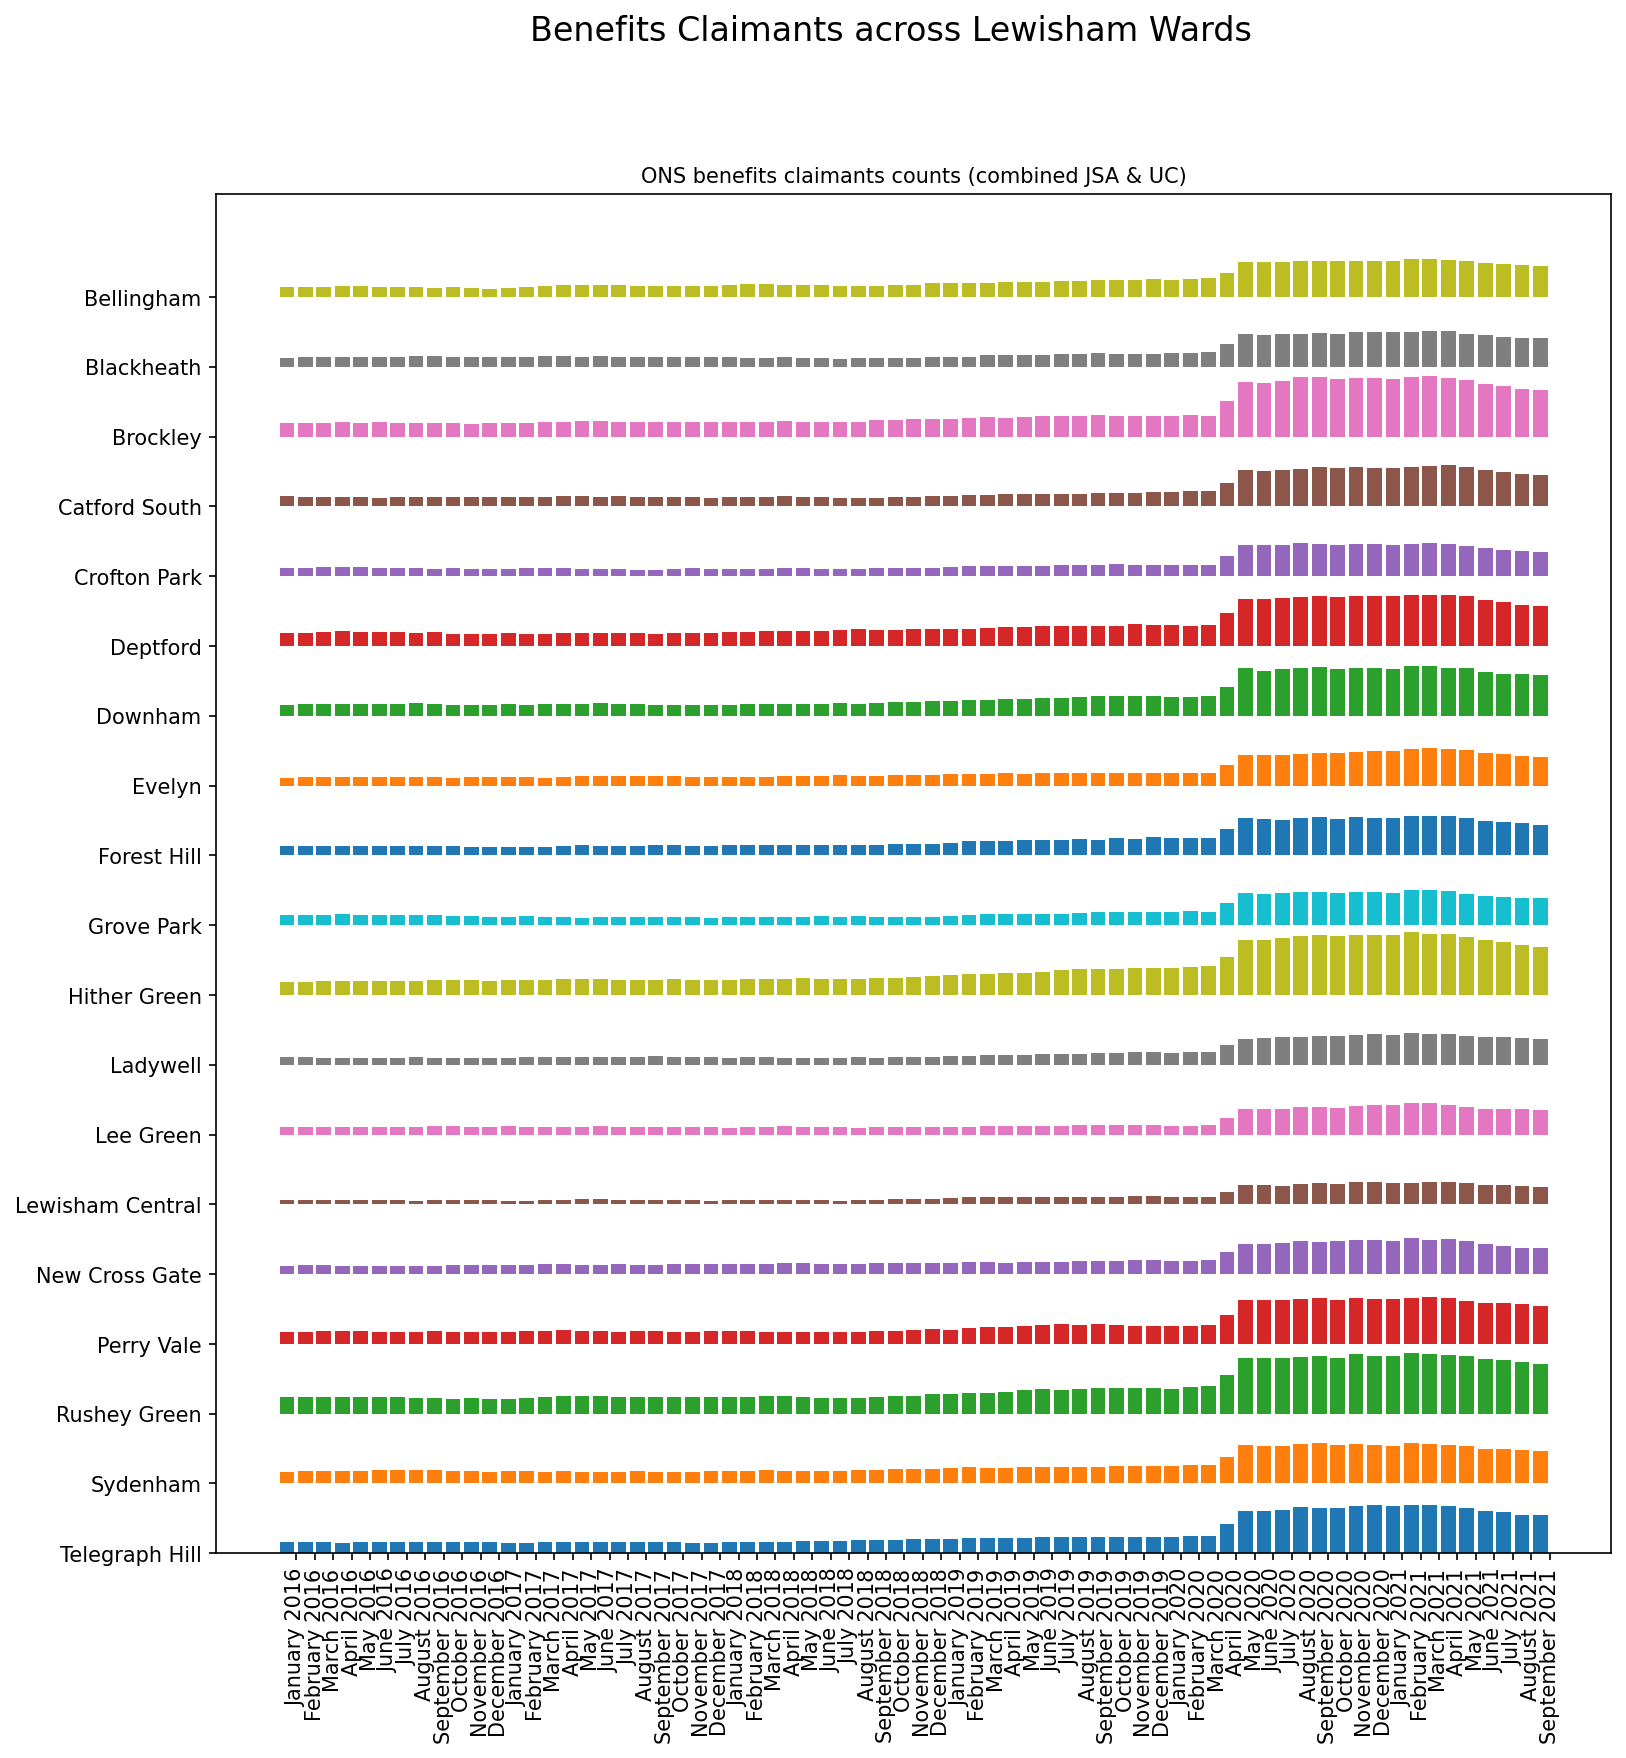

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=150)

plt.suptitle('Benefits Claimants across Lewisham Wards', fontsize=16)
plt.title('ONS benefits claimants counts (combined JSA & UC)', fontsize=10)

data = total.set_index('WD22NM_proposed')[months]
data = data / data.max().max() # [0..1]
ward_names = list(reversed(data.index)) 

for idx, ward in enumerate(ward_names):
  values = data.loc[ward].values
  plt.bar(x=range(len(values)),
          y=idx, 
          width=0.8, 
          height=values * 0.9,
          linewidth=0)
plt.yticks(np.arange(len(ward_names)), ward_names)
# plt.xticks(np.arange(len(months))+0.5)
plt.xticks(np.arange(len(months))+0.5, months)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
ax.tick_params(axis="x", labelrotation= 90)

Covid impact
==

Ward ranking
--

In [21]:
# initial_month_index = np.where(months=='March 2020')[0][0]
# covid_months = months[initial_month_index:]
# covid_months

array(['March 2020', 'April 2020', 'May 2020', 'June 2020', 'July 2020',
       'August 2020', 'September 2020', 'October 2020', 'November 2020',
       'December 2020', 'January 2021', 'February 2021', 'March 2021',
       'April 2021', 'May 2021', 'June 2021', 'July 2021', 'August 2021',
       'September 2021'], dtype=object)

In [39]:
# data = total.set_index('WD22NM_proposed')[covid_months].sum(axis=1).sort_values()
# data

# Compare Feb 2020 to Feb 2021 (the approx peak)
data = total.set_index('WD22NM_proposed')
data = (data['February 2021'] * 100. / data['February 2020']).sort_values().round(1)
data

WD22NM_proposed
Bellingham          206.2
Sydenham            213.1
Hither Green        225.2
Rushey Green        228.6
Forest Hill         230.0
Ladywell            239.1
Grove Park          242.1
Blackheath          247.3
Deptford            248.6
Perry Vale          257.4
Catford South       258.0
New Cross Gate      266.2
Downham             272.2
Brockley            277.0
Crofton Park        282.0
Telegraph Hill      282.4
Evelyn              300.0
Lewisham Central    300.0
Lee Green           353.2
dtype: float64

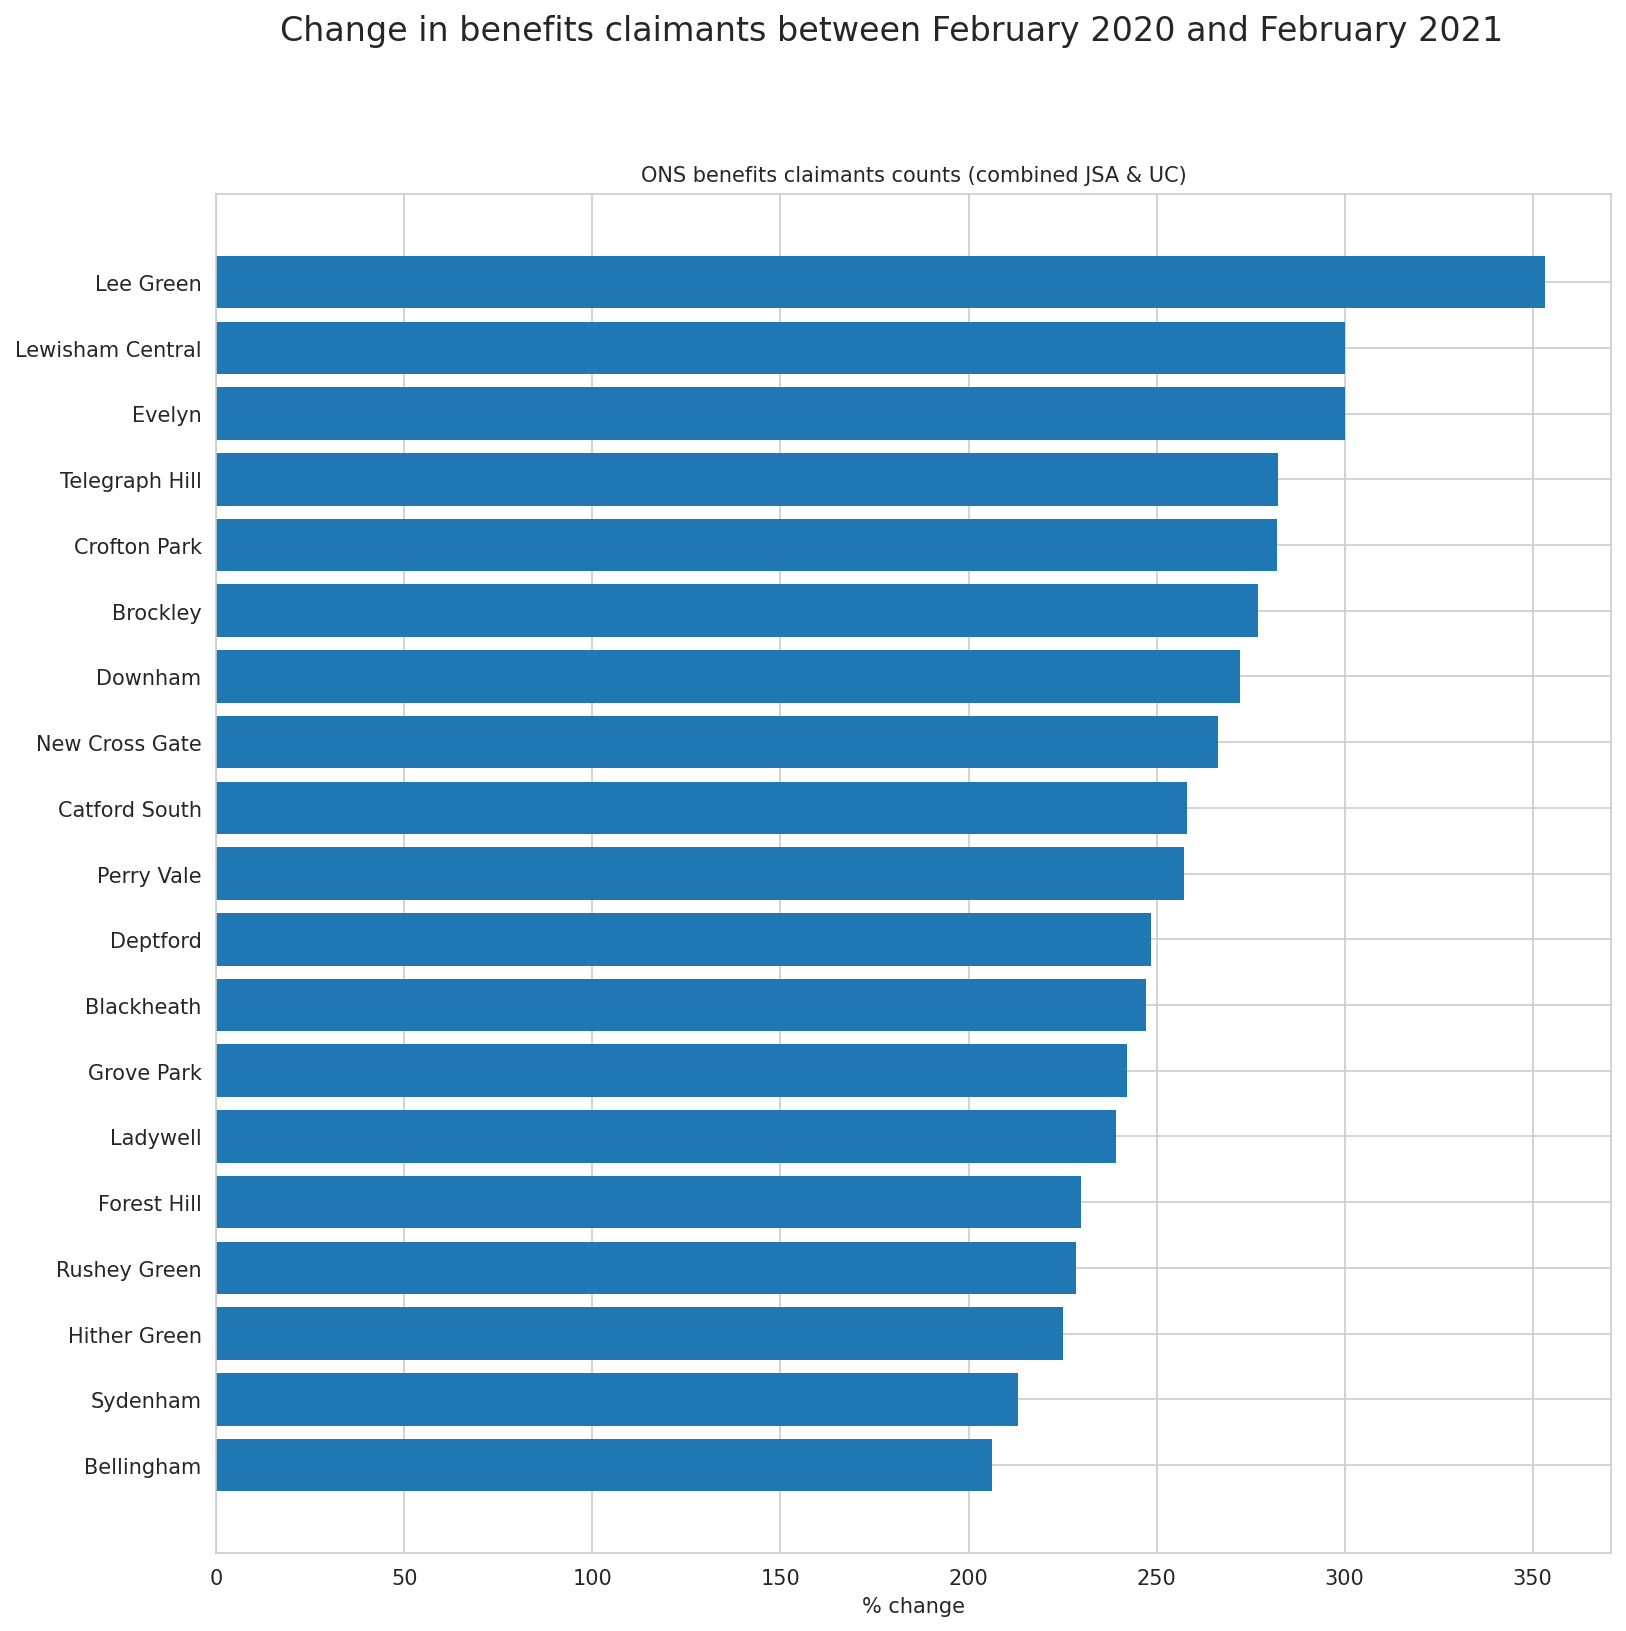

In [40]:
# Relative change in the first year (the approximate peak)
with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=150)

  plt.suptitle(f'Change in benefits claimants between February 2020 and February 2021', fontsize=16)
  plt.title('ONS benefits claimants counts (combined JSA & UC)', fontsize=10)

  plt.barh(y=range(len(data)),
          width=data.values,
          linewidth=0)
  plt.yticks(np.arange(len(data)), data.index)
  plt.xlabel('% change')

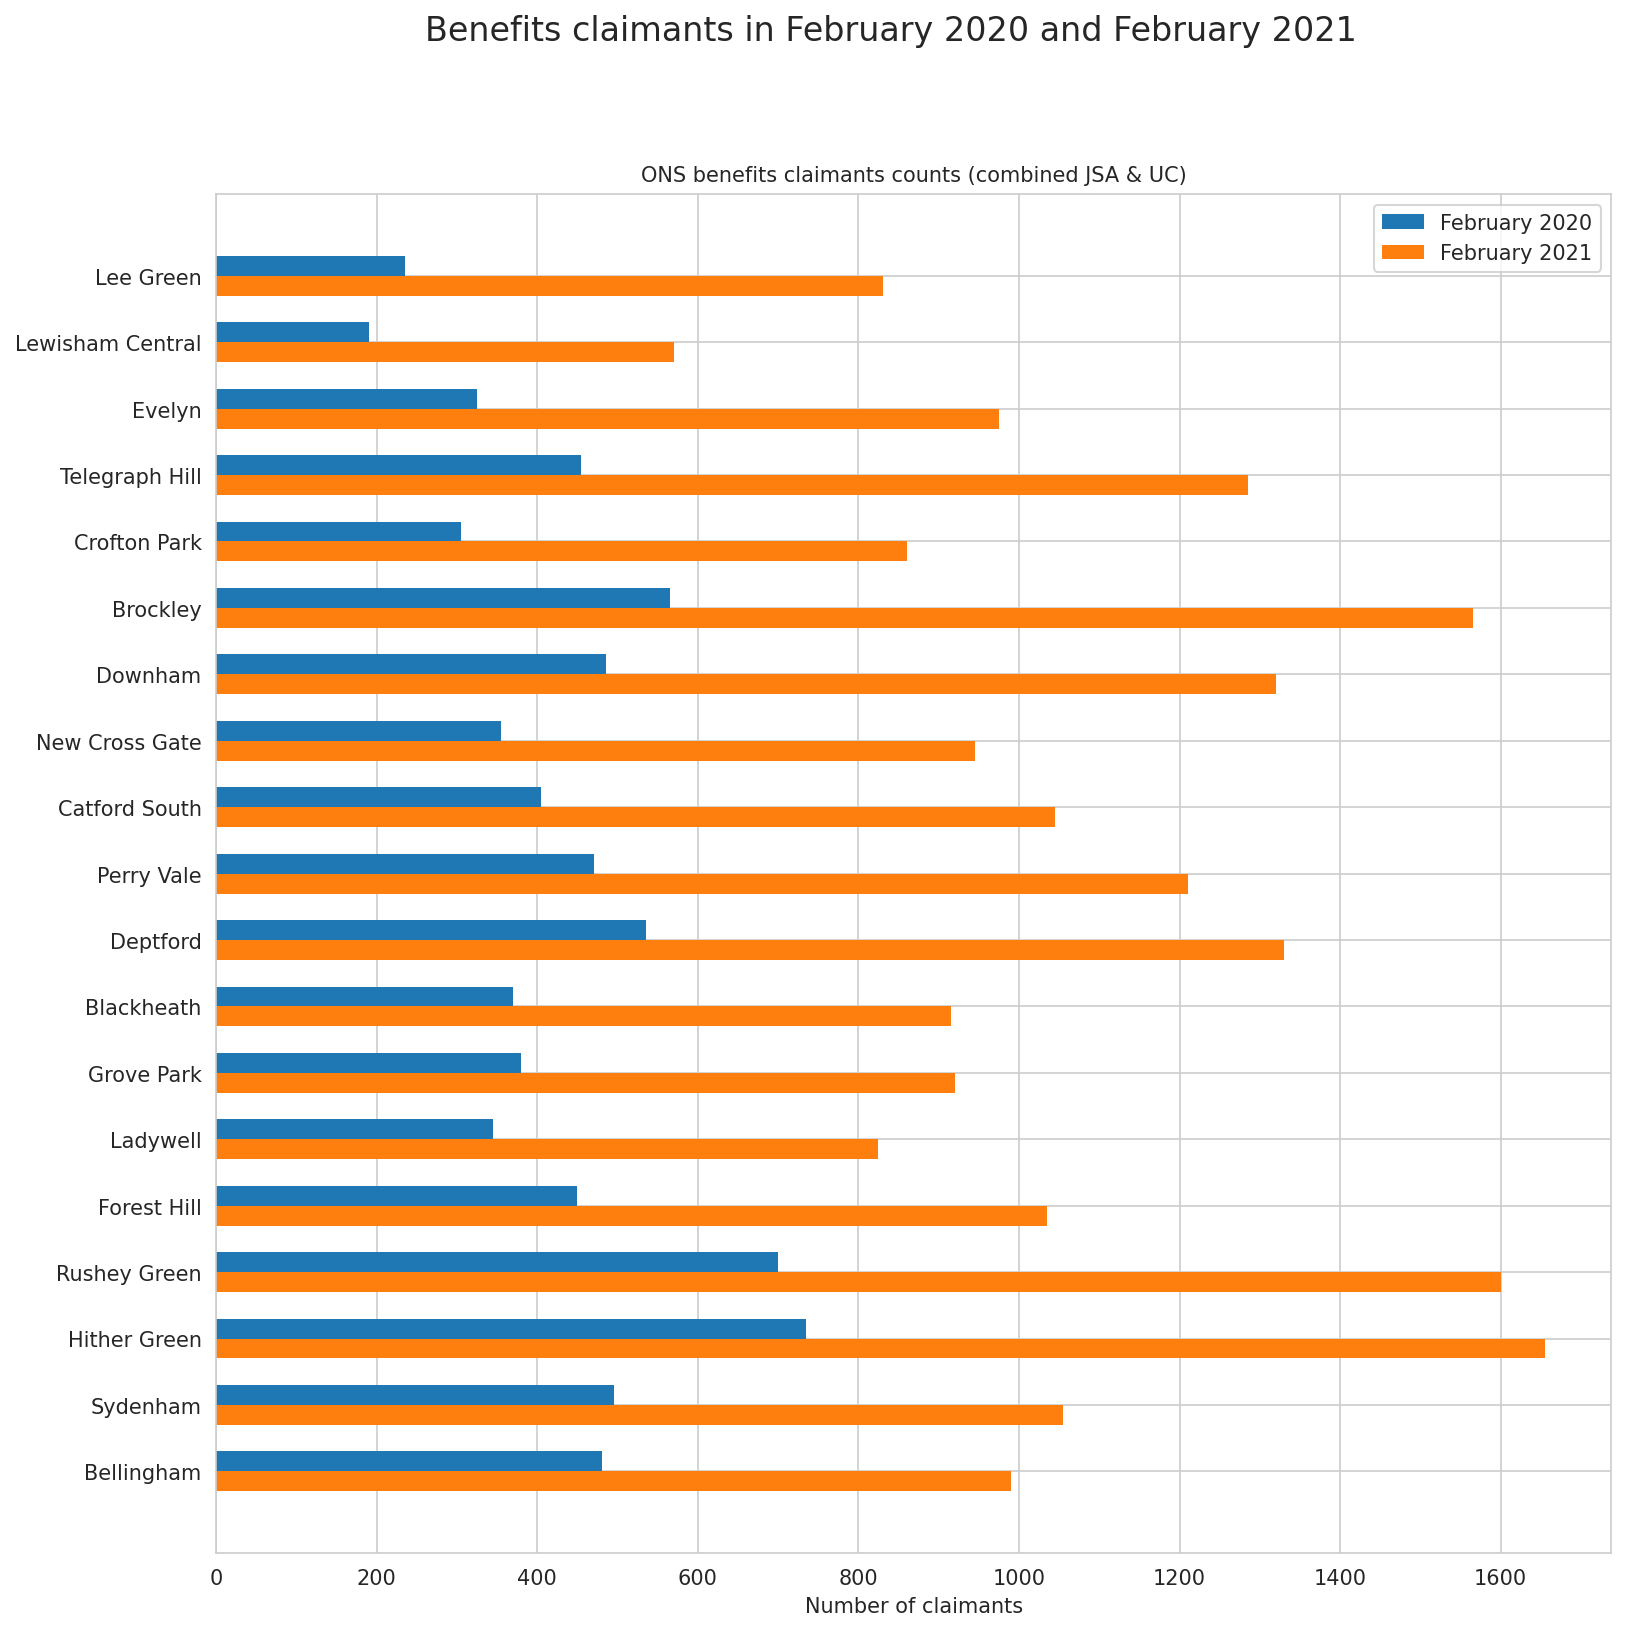

In [47]:
# Absolute pre/post numbers

# using the same Ward order as above
abs_data = total.set_index('WD22NM_proposed').loc[data.index]

with sns.axes_style("whitegrid"):
  fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=150)

  plt.suptitle(f'Benefits claimants in February 2020 and February 2021', fontsize=16)
  plt.title('ONS benefits claimants counts (combined JSA & UC)', fontsize=10)

  plt.barh(y=np.arange(len(abs_data)) + 0.15,
           width=abs_data['February 2020'],
           label='February 2020',
           height=0.3,
           linewidth=0)
  plt.barh(y=np.arange(len(abs_data)) - 0.15,
           width=abs_data['February 2021'],
           label='February 2021',
           height=0.3,
           linewidth=0)

  plt.legend(loc='upper right')

  plt.yticks(np.arange(len(data)), data.index)
  plt.xlabel('Number of claimants')


Across age groups
==

In [ ]:
# TODO (need to prep the data first)